In [1]:
import sys
import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt

from tools.DataLoader import DataLoader
from tools.DataSet import DataSet
from tools.ModelTester import ModelTester
from models import Models
from tools.Metrics import *

%matplotlib inline
plt.rcParams['figure.figsize'] = (14.0, 8.0) # set default size of plots

%load_ext autoreload
%autoreload 2

In [2]:
dl = DataLoader("data/train.csv", class_col_name="species", excluded_features={"id"})
dl.load()
dataset = dl.get_dataset()

print(f"Number of data entries : {len(dataset)}")
print(f"Number of classes : {len(dataset.group_by_class())}")

grouppedClasses = pd.DataFrame(
    data=np.array([ len(ds) for ds in dataset.group_by_class() ]),
    columns=["Count"],
    index=[f"{dl.get_label_name(ds.labels[0])}" for ds in dataset.group_by_class()]
)
display(grouppedClasses)

dataset.shuffle()
train_set, test_set = dataset.stratified_split([0.7])
print(f"Train set : {len(train_set)} - Number of classes : {len(train_set.group_by_class())}")
print(f"Train set : {len(test_set)} - Number of classes : {len(test_set.group_by_class())}")

Number of data entries : 990
Number of classes : 99


,Count
Acer_Opalus,10
Pterocarya_Stenoptera,10
Quercus_Hartwissiana,10
Tilia_Tomentosa,10
Quercus_Variabilis,10
Magnolia_Salicifolia,10
Quercus_Canariensis,10
Quercus_Rubra,10
Quercus_Brantii,10
Salix_Fragilis,10


Train set : 693 - Number of classes : 99
Train set : 297 - Number of classes : 99


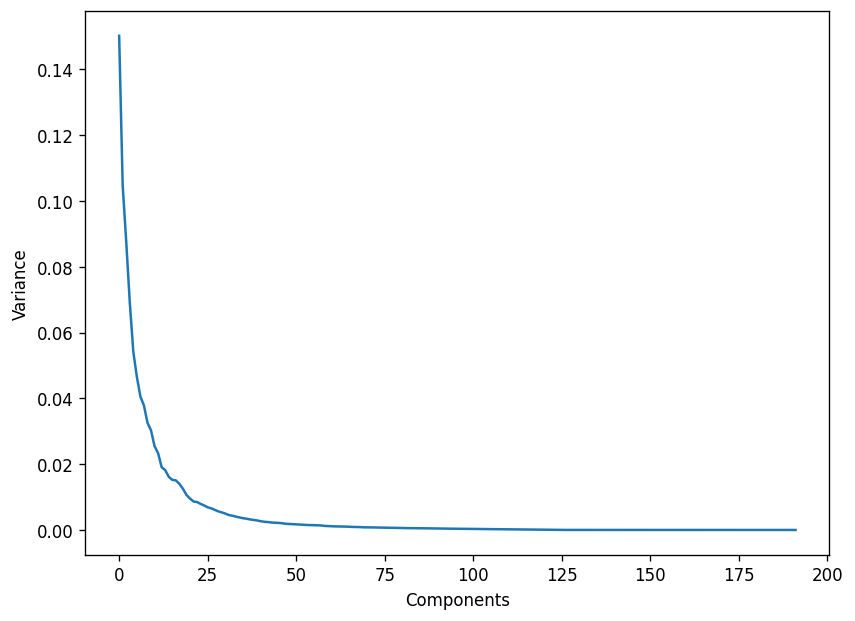

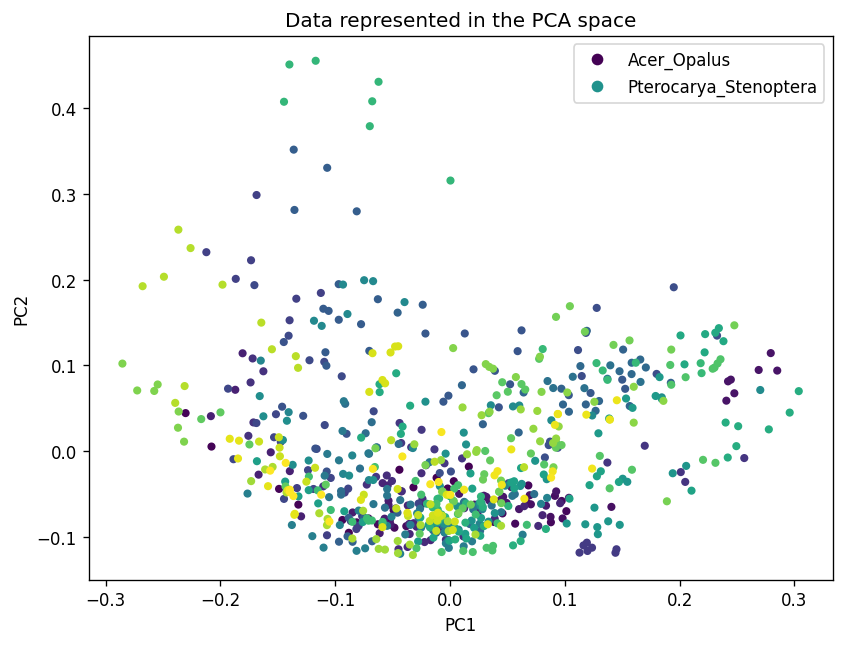

In [3]:
from sklearn.decomposition import PCA

# Project into the PCA space (2 major axis)
pca = PCA()
pcaSpace = pca.fit_transform(train_set.features)
pcaSpaceXY = (pcaSpace[:,0], pcaSpace[:,1])

# Plot PCA axis contributions
plt.figure(figsize=(8, 6), dpi=120)
plt.plot(pca.explained_variance_ratio_)
plt.ylabel("Variance")
plt.xlabel("Components")
plt.show()

# Plot data in the PCA space (2 major axis)
plt.figure(figsize=(8, 6), dpi=120)
plt.xlabel("PC1")
plt.ylabel("PC2")
scatter = plt.scatter(x=pcaSpaceXY[0], y=pcaSpaceXY[1], c=train_set.labels, s=15)
plt.legend(handles=scatter.legend_elements(num=3)[0], labels=dl.classes)
plt.title("Data represented in the PCA space", loc='center', wrap=True)
plt.show()

~~~~~~~~~~~~~~~ LEARNING CURVE ~~~~~~~~~~~~~~~


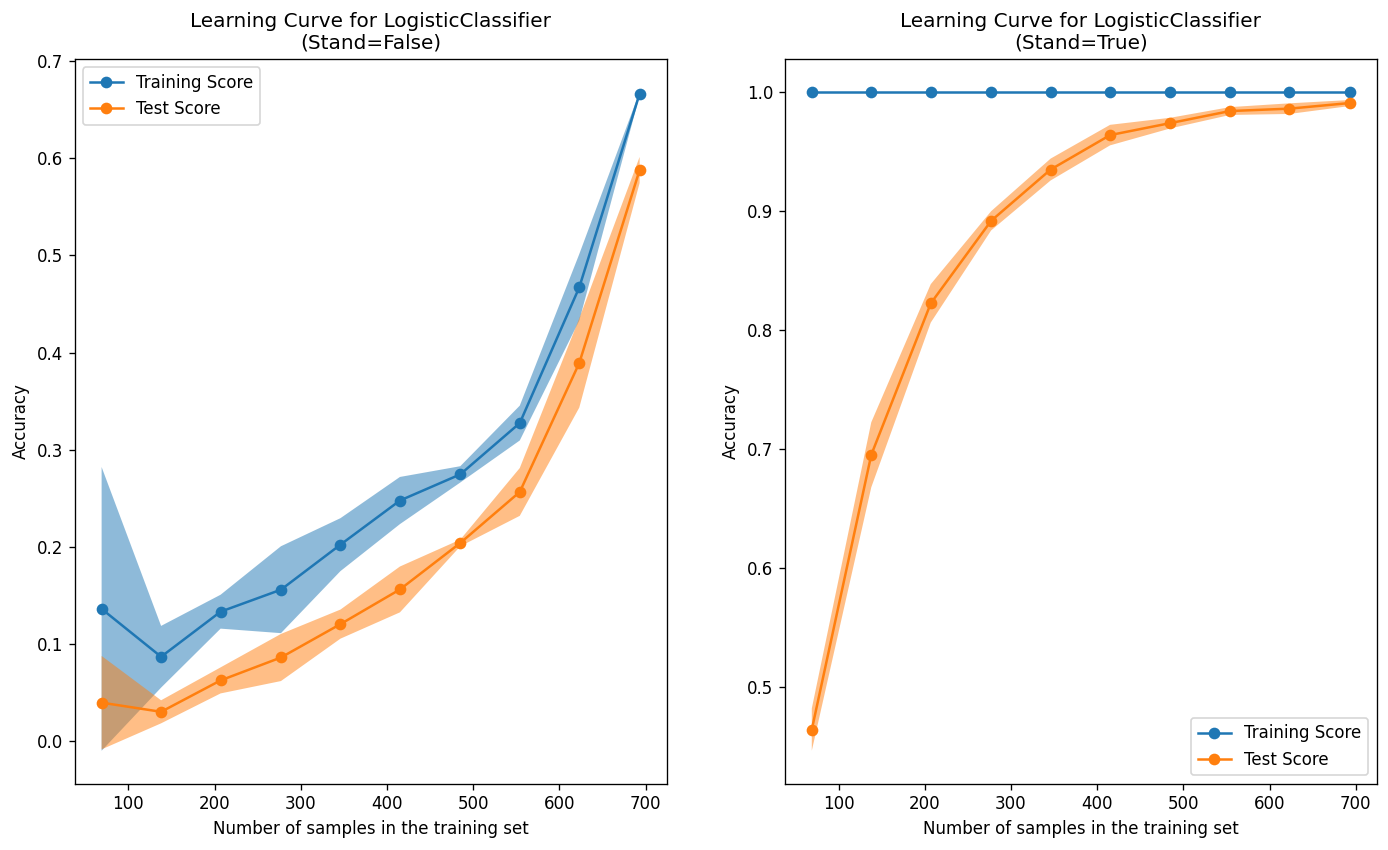

~~~~~~~~~~~~~~~ TRAIN SET ~~~~~~~~~~~~~~~


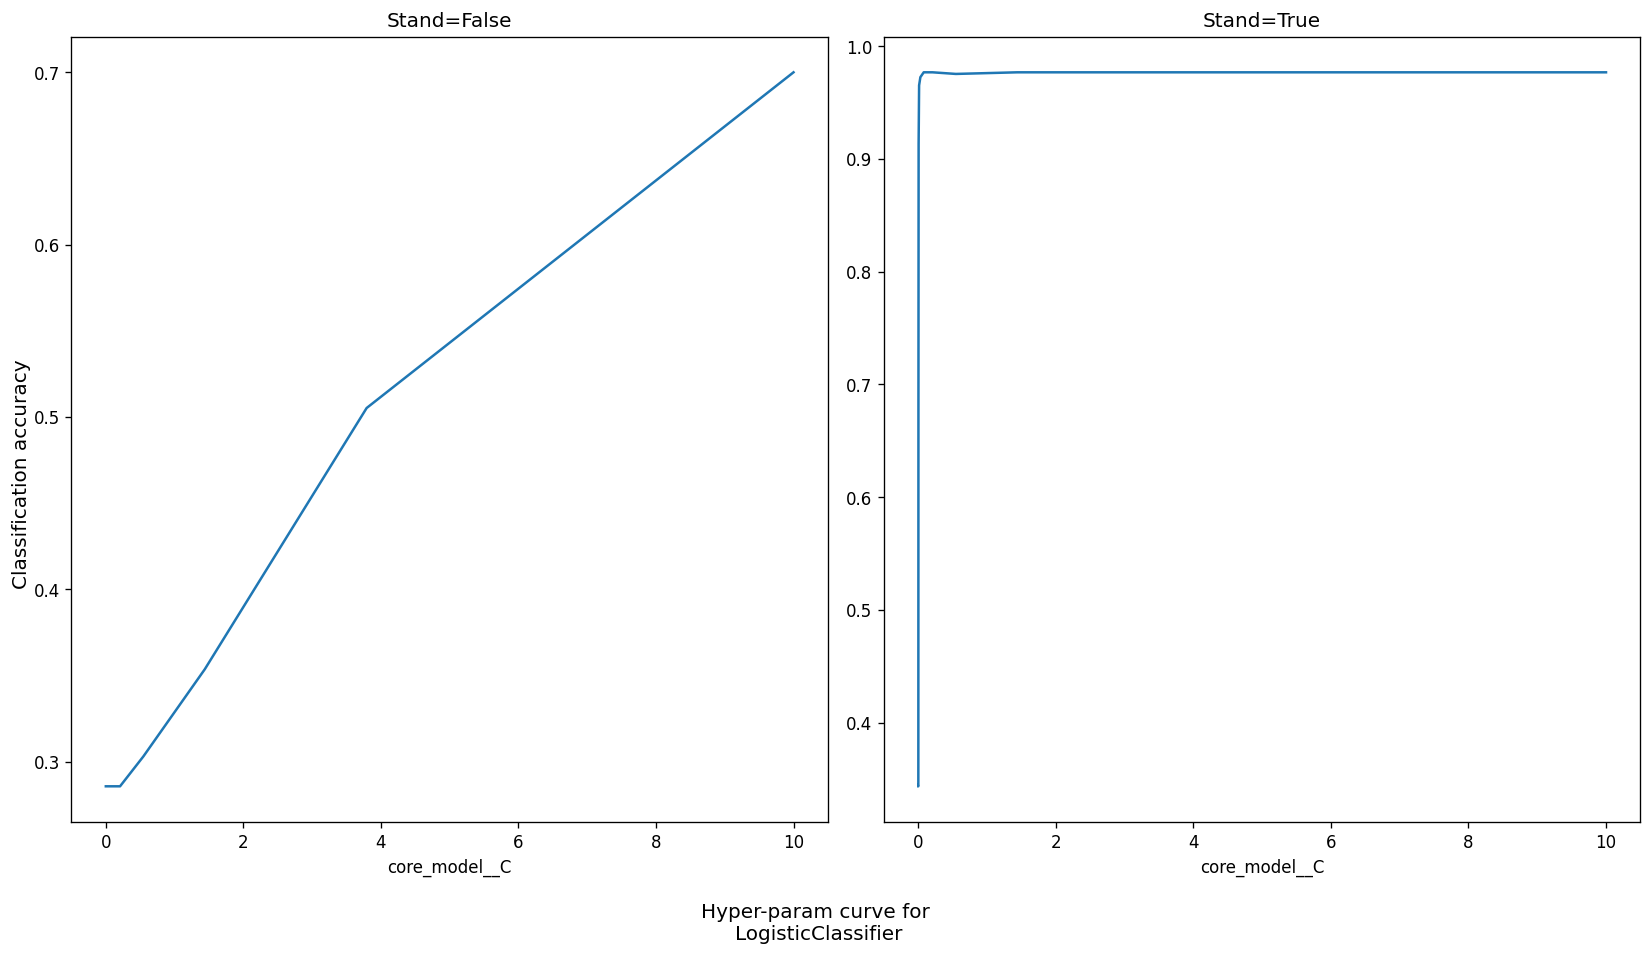

,LogisticClassifier (Stand=False),LogisticClassifier (Stand=True)
Accuracy,0.898989898989899,1.0
Precision,0.898989898989899,1.0
Recall,0.898989898989899,1.0
Specificity,0.9989692846835704,1.0
Fallout,0.0010307153164296021,0.0
F1 Score,0.8516335287270445,1.0
F Score,0.898989898989899,1.0
Support,Not Applicable,Not Applicable
ROC AUC,0.9980058813878054,1.0
Log loss,2.396410119318249,0.2306207230383912


~~~~~~~~~~~~~~~ TEST SET ~~~~~~~~~~~~~~~


,LogisticClassifier (Stand=False),LogisticClassifier (Stand=True)
Accuracy,0.8181818181818182,0.9932659932659933
Precision,0.8181818181818182,0.9932659932659933
Recall,0.8181818181818182,0.9932659932659933
Specificity,0.9981447124304267,0.9999312856455713
Fallout,0.0018552875695732839,6.871435442864014e-05
F1 Score,0.7371157953384716,0.9899444915130785
F Score,0.8181818181818182,0.9932659932659933
Support,Not Applicable,Not Applicable
ROC AUC,0.9942279942279942,0.9999885476075953
Log loss,2.5271165432009206,0.3821097622726536


~~~~~~~~~~~~~~~ LEARNING CURVE ~~~~~~~~~~~~~~~


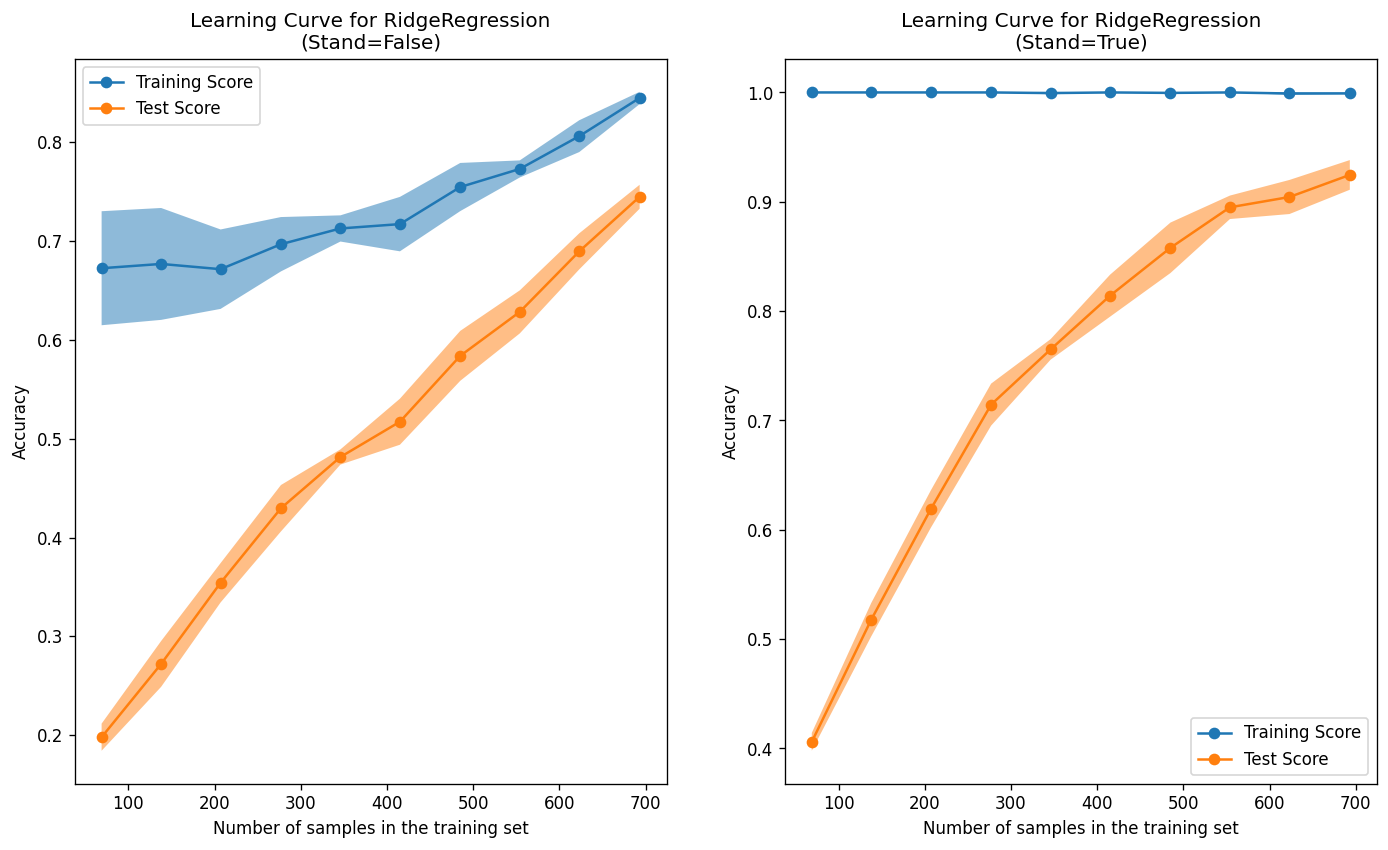

~~~~~~~~~~~~~~~ TRAIN SET ~~~~~~~~~~~~~~~


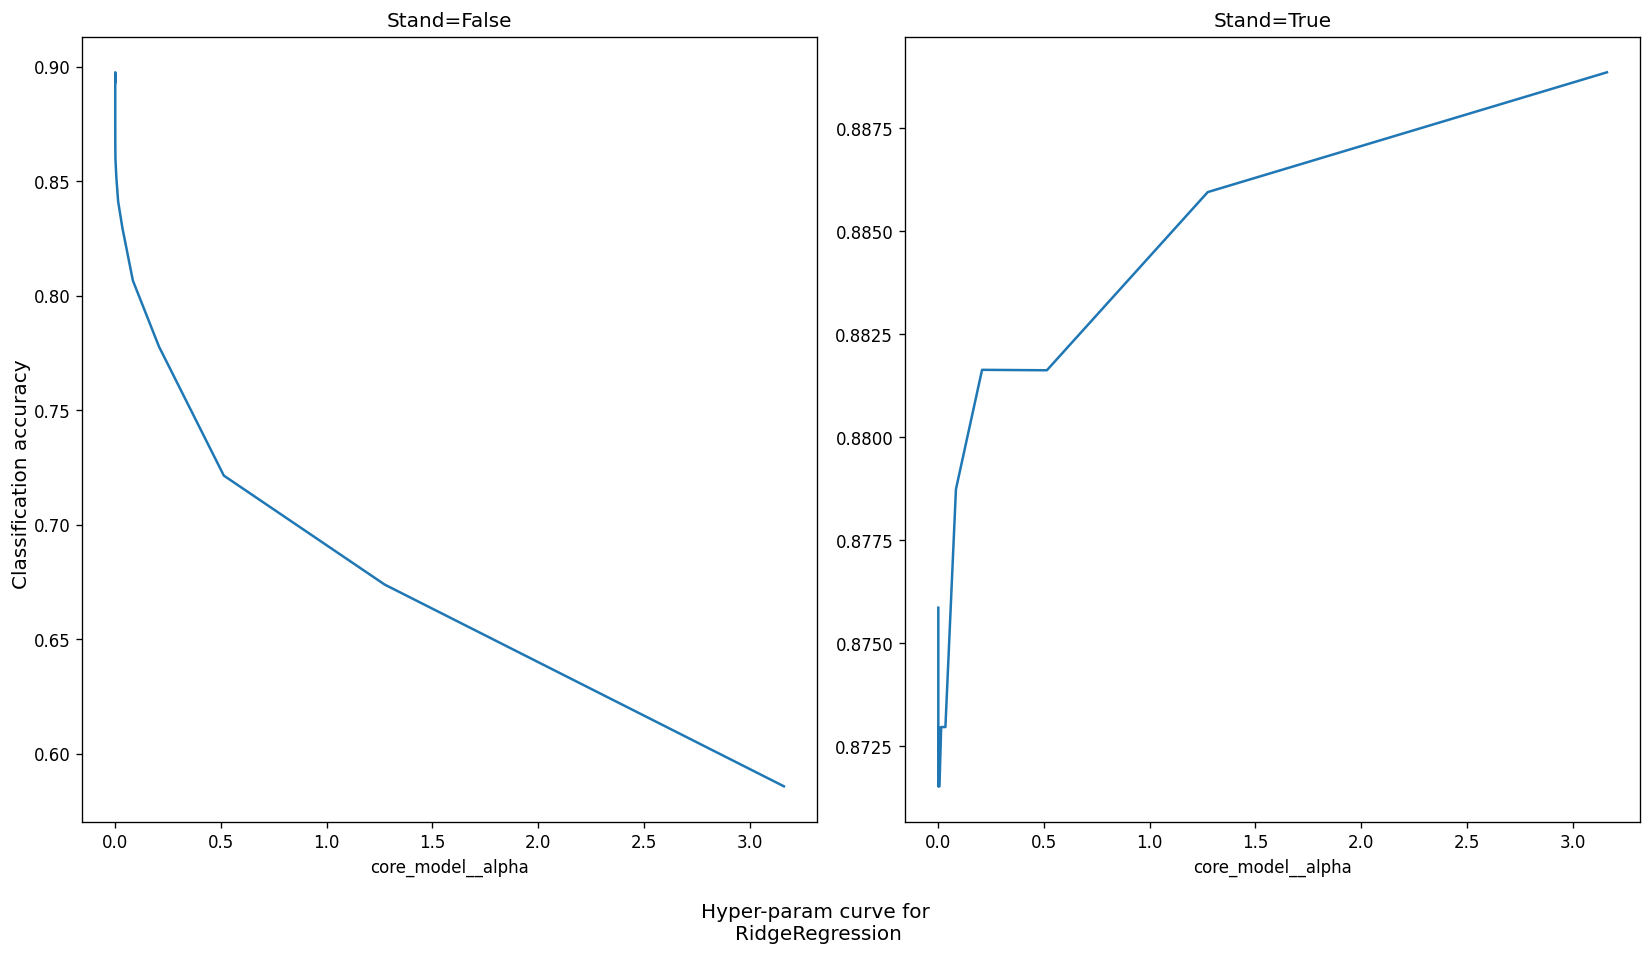

,RidgeRegression (Stand=False),RidgeRegression (Stand=True)
Accuracy,0.9985569985569985,0.9985569985569985
Precision,0.9985569985569985,0.9985569985569985
Recall,0.9985569985569985,0.9985569985569985
Specificity,0.9999852754954796,0.9999852754954796
Fallout,1.4724504520422888e-05,1.4724504520422888e-05
F1 Score,0.997843370453498,0.997843370453498
F Score,0.9985569985569985,0.9985569985569985
Support,Not Applicable,Not Applicable
ROC AUC,Not Applicable,Not Applicable
Log loss,Not Applicable,Not Applicable


~~~~~~~~~~~~~~~ TEST SET ~~~~~~~~~~~~~~~


,RidgeRegression (Stand=False),RidgeRegression (Stand=True)
Accuracy,0.9090909090909091,0.9090909090909091
Precision,0.9090909090909091,0.9090909090909091
Recall,0.9090909090909091,0.9090909090909091
Specificity,0.9990723562152134,0.9990723562152134
Fallout,0.0009276437847866419,0.0009276437847866419
F1 Score,0.8662217704512307,0.8662217704512307
F Score,0.9090909090909091,0.9090909090909091
Support,Not Applicable,Not Applicable
ROC AUC,Not Applicable,Not Applicable
Log loss,Not Applicable,Not Applicable


~~~~~~~~~~~~~~~ LEARNING CURVE ~~~~~~~~~~~~~~~


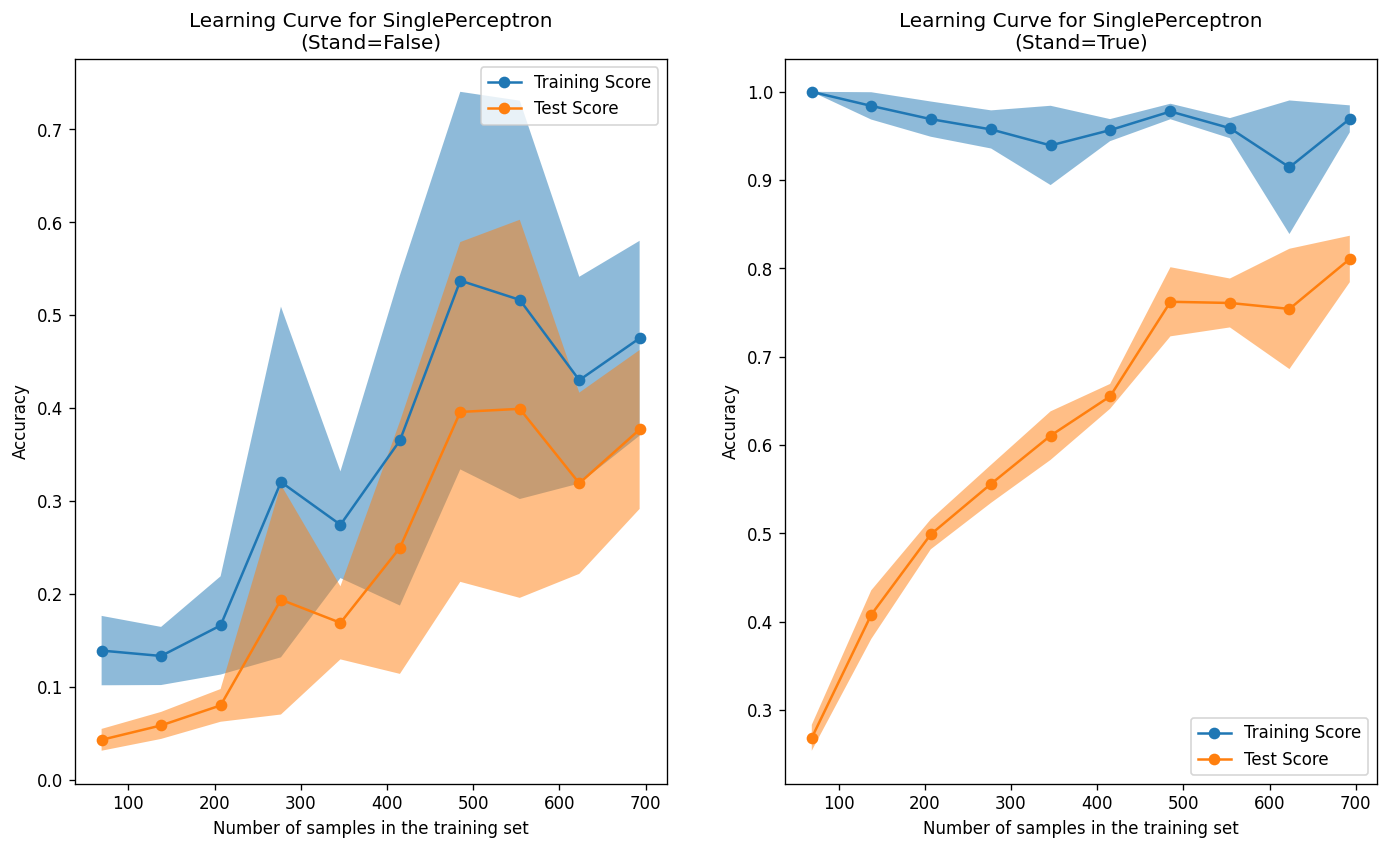

~~~~~~~~~~~~~~~ TRAIN SET ~~~~~~~~~~~~~~~


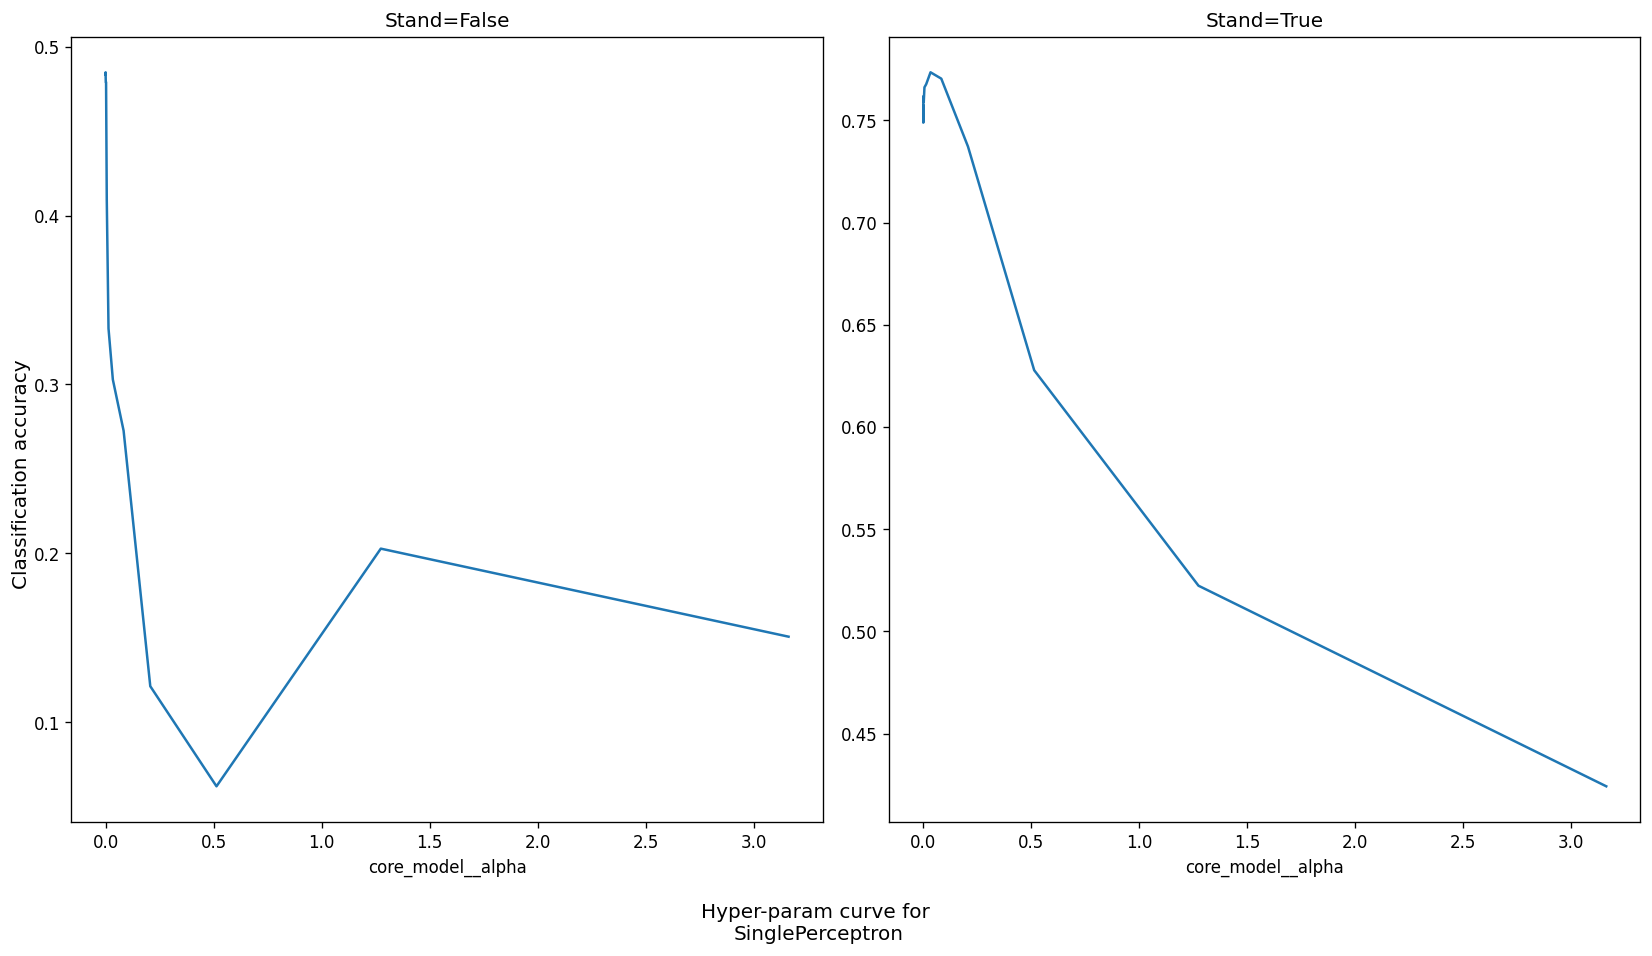

,SinglePerceptron (Stand=False),SinglePerceptron (Stand=True)
Accuracy,0.8181818181818182,0.963924963924964
Precision,0.8181818181818182,0.963924963924964
Recall,0.8181818181818182,0.963924963924964
Specificity,0.9981447124304267,0.9996318873869894
Fallout,0.0018552875695732839,0.0003681126130105722
F1 Score,0.7371157953384716,0.9463961641415467
F Score,0.8181818181818182,0.963924963924964
Support,Not Applicable,Not Applicable
ROC AUC,Not Applicable,Not Applicable
Log loss,Not Applicable,Not Applicable


~~~~~~~~~~~~~~~ TEST SET ~~~~~~~~~~~~~~~


,SinglePerceptron (Stand=False),SinglePerceptron (Stand=True)
Accuracy,0.734006734006734,0.8282828282828283
Precision,0.734006734006734,0.8282828282828283
Recall,0.734006734006734,0.8282828282828283
Specificity,0.9972857830000688,0.9982477839620697
Fallout,0.0027142169999312855,0.0017522160379303236
F1 Score,0.6223857381405357,0.7512082622968013
F Score,0.734006734006734,0.8282828282828283
Support,Not Applicable,Not Applicable
ROC AUC,Not Applicable,Not Applicable
Log loss,Not Applicable,Not Applicable


~~~~~~~~~~~~~~~ LEARNING CURVE ~~~~~~~~~~~~~~~


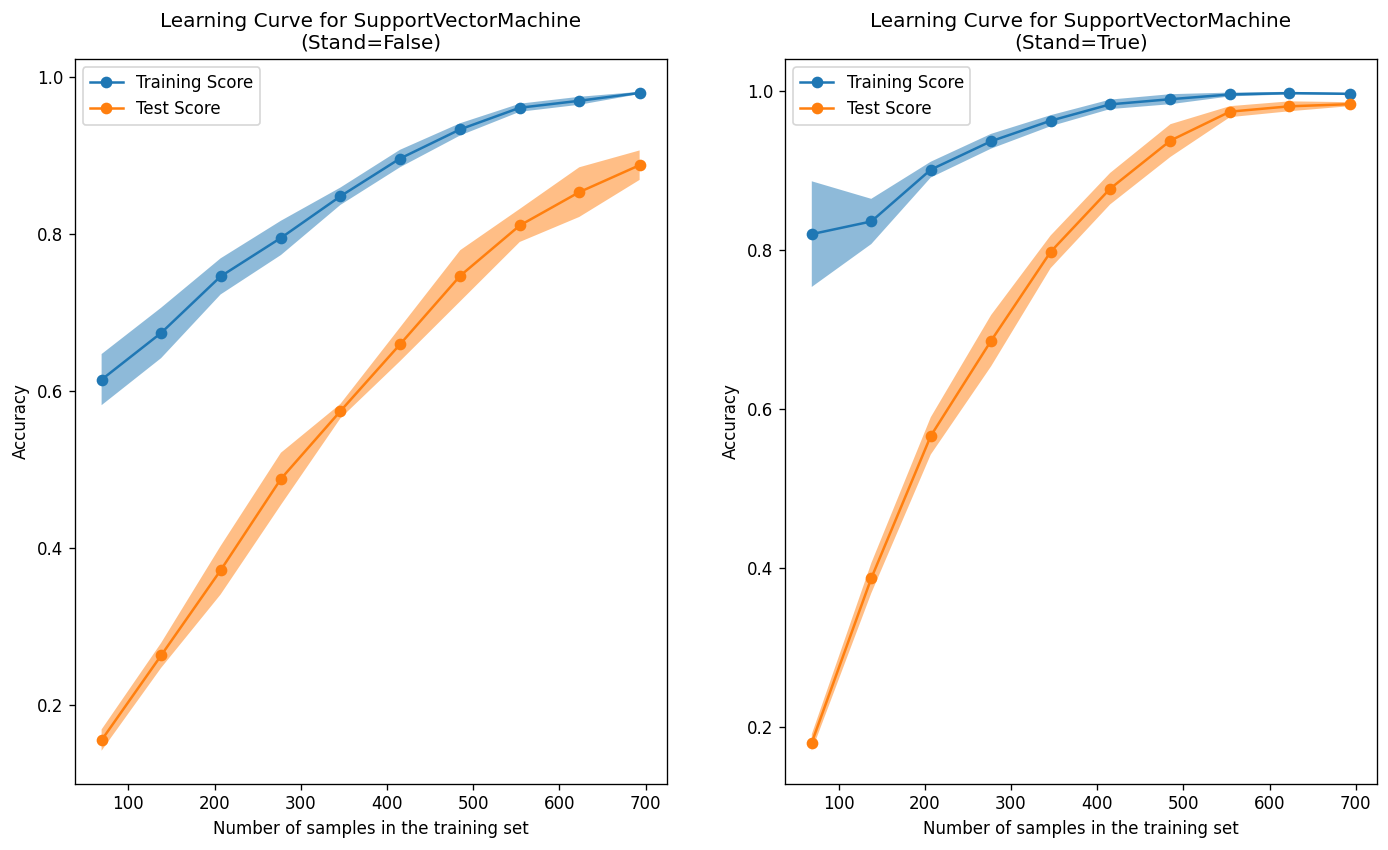

~~~~~~~~~~~~~~~ TRAIN SET ~~~~~~~~~~~~~~~


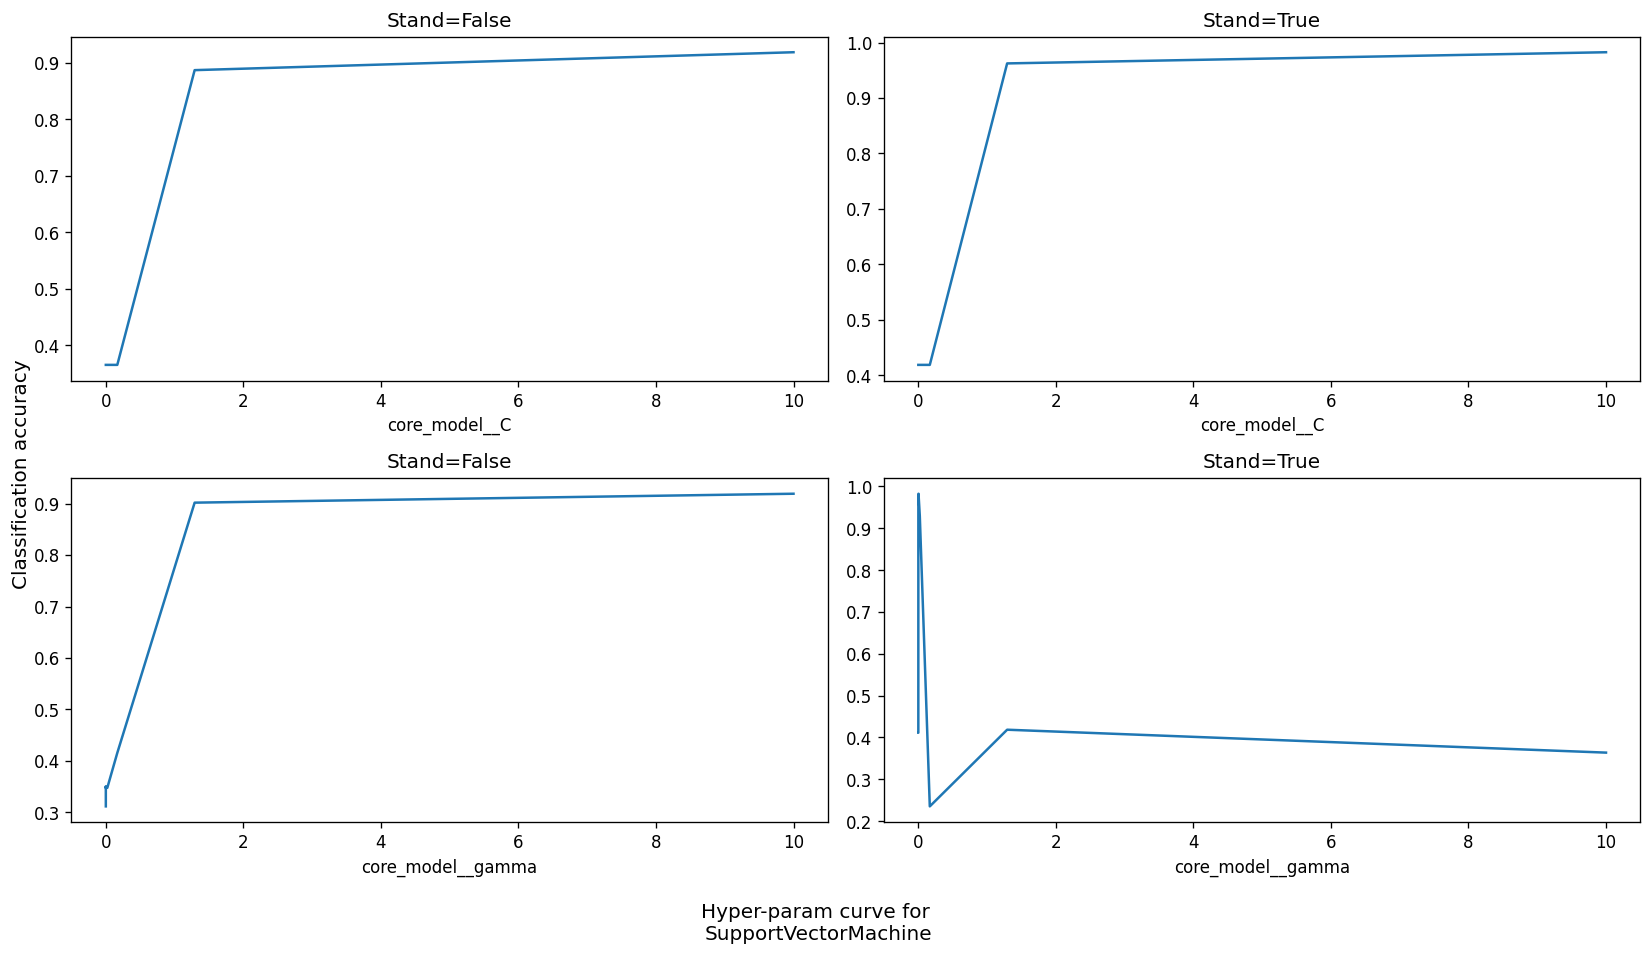

,SupportVectorMachine (Stand=False),SupportVectorMachine (Stand=True)
Accuracy,1.0,1.0
Precision,1.0,1.0
Recall,1.0,1.0
Specificity,1.0,1.0
Fallout,0.0,0.0
F1 Score,1.0,1.0
F Score,1.0,1.0
Support,Not Applicable,Not Applicable
ROC AUC,1.0,1.0
Log loss,2.189130504252329,2.3193689820606966


~~~~~~~~~~~~~~~ TEST SET ~~~~~~~~~~~~~~~


,SupportVectorMachine (Stand=False),SupportVectorMachine (Stand=True)
Accuracy,0.9124579124579124,0.9797979797979798
Precision,0.9124579124579124,0.9797979797979798
Recall,0.9124579124579124,0.9797979797979798
Specificity,0.9991067133924276,0.9997938569367141
Fallout,0.0008932866075723219,0.00020614306328592042
F1 Score,0.8710973521354916,0.9699010305070911
F Score,0.9124579124579124,0.9797979797979798
Support,Not Applicable,Not Applicable
ROC AUC,0.998327950708903,0.9999770952151904
Log loss,2.4812589769645856,2.491405637255723


In [4]:
# Logistic Regression :
mt = ModelTester("LogisticClassifier")
mt.test(dataset, train_set, test_set)

# Ridge Regression : 
mt = ModelTester("RidgeRegression")
mt.test(dataset, train_set, test_set)

# Perceptron : 
mt = ModelTester("SinglePerceptron")
mt.test(dataset, train_set, test_set)

# SVM : 
mt = ModelTester("SupportVectorMachine")
mt.test(dataset, train_set, test_set)


~~~~~~~~~~~~~~~ LEARNING CURVE ~~~~~~~~~~~~~~~


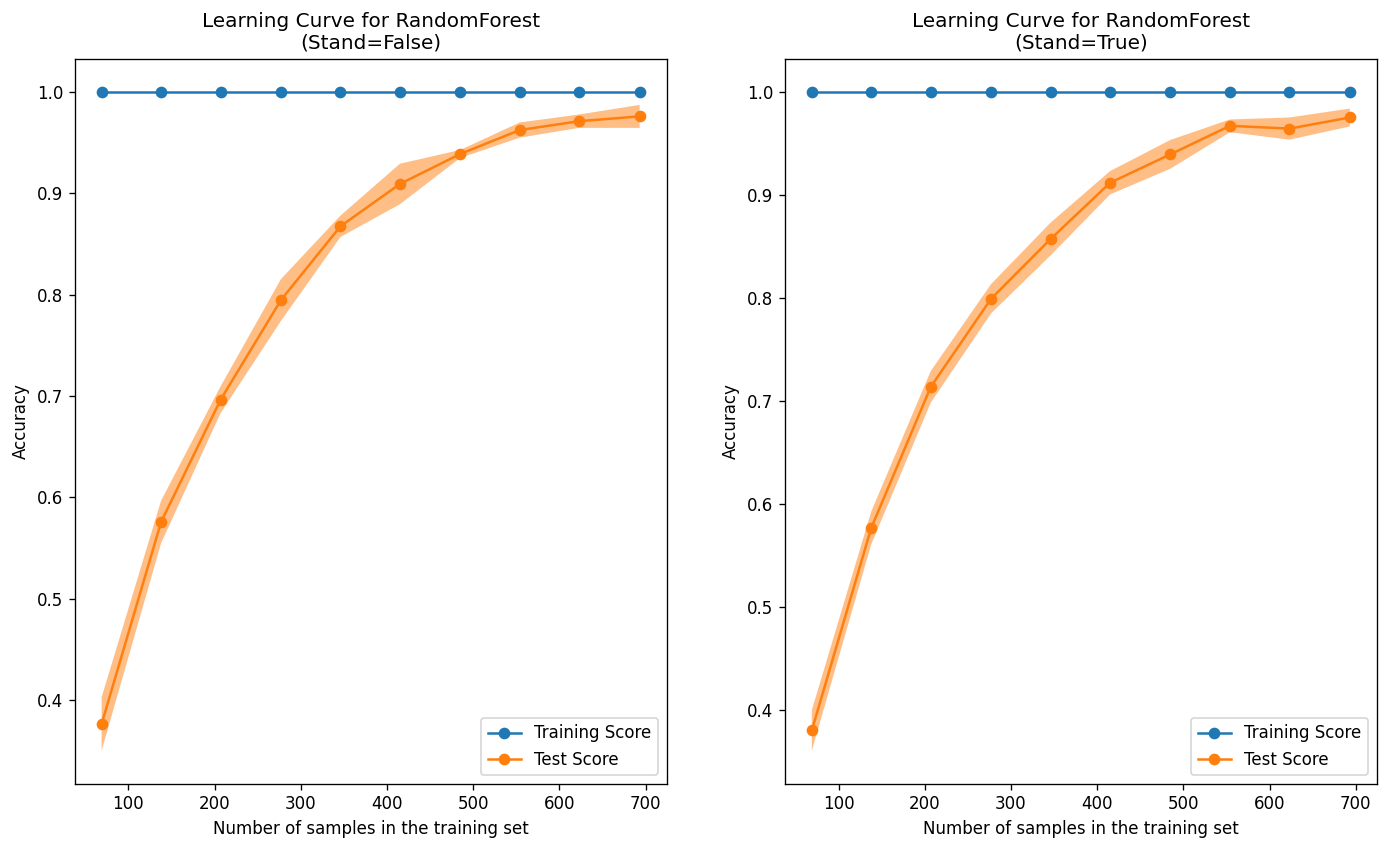

~~~~~~~~~~~~~~~ TRAIN SET ~~~~~~~~~~~~~~~


,RandomForest (Stand=False),RandomForest (Stand=True)
Accuracy,1.0,1.0
Precision,1.0,1.0
Recall,1.0,1.0
Specificity,1.0,1.0
Fallout,0.0,0.0
F1 Score,1.0,1.0
F Score,1.0,1.0
Support,Not Applicable,Not Applicable
ROC AUC,1.0,1.0
Log loss,0.24241744222776826,0.24354833019081096


~~~~~~~~~~~~~~~ TEST SET ~~~~~~~~~~~~~~~


,RandomForest (Stand=False),RandomForest (Stand=True)
Accuracy,0.9865319865319865,0.9797979797979798
Precision,0.9865319865319865,0.9797979797979798
Recall,0.9865319865319865,0.9797979797979798
Specificity,0.9998625712911428,0.9997938569367141
Fallout,0.0001374287088572803,0.00020614306328592042
F1 Score,0.979911424563424,0.9699010305070911
F Score,0.9865319865319865,0.9797979797979798
Support,Not Applicable,Not Applicable
ROC AUC,0.9998854760759522,0.9998854760759522
Log loss,0.8047530076677045,0.8177490131680083


~~~~~~~~~~~~~~~ LEARNING CURVE ~~~~~~~~~~~~~~~


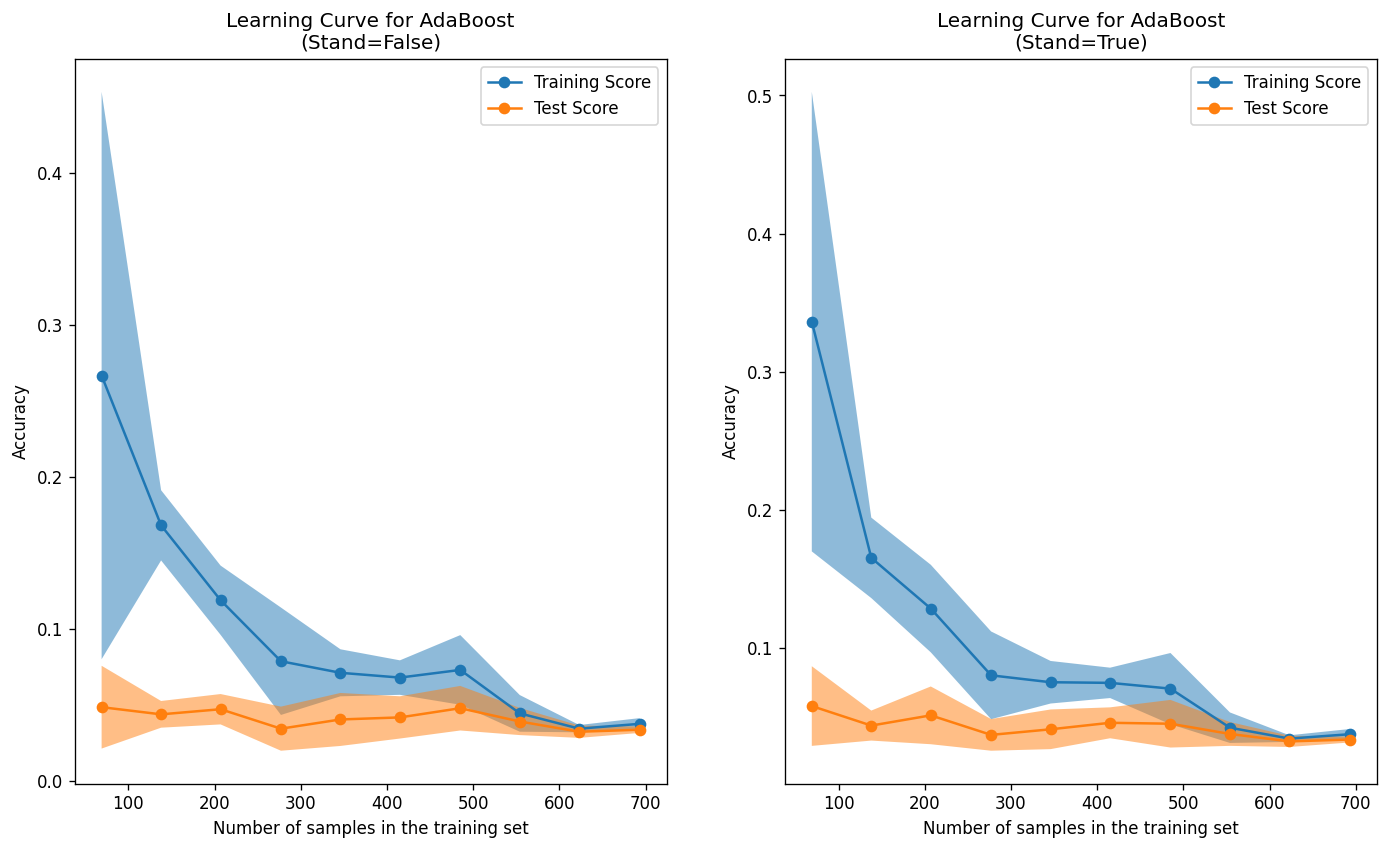

~~~~~~~~~~~~~~~ TRAIN SET ~~~~~~~~~~~~~~~


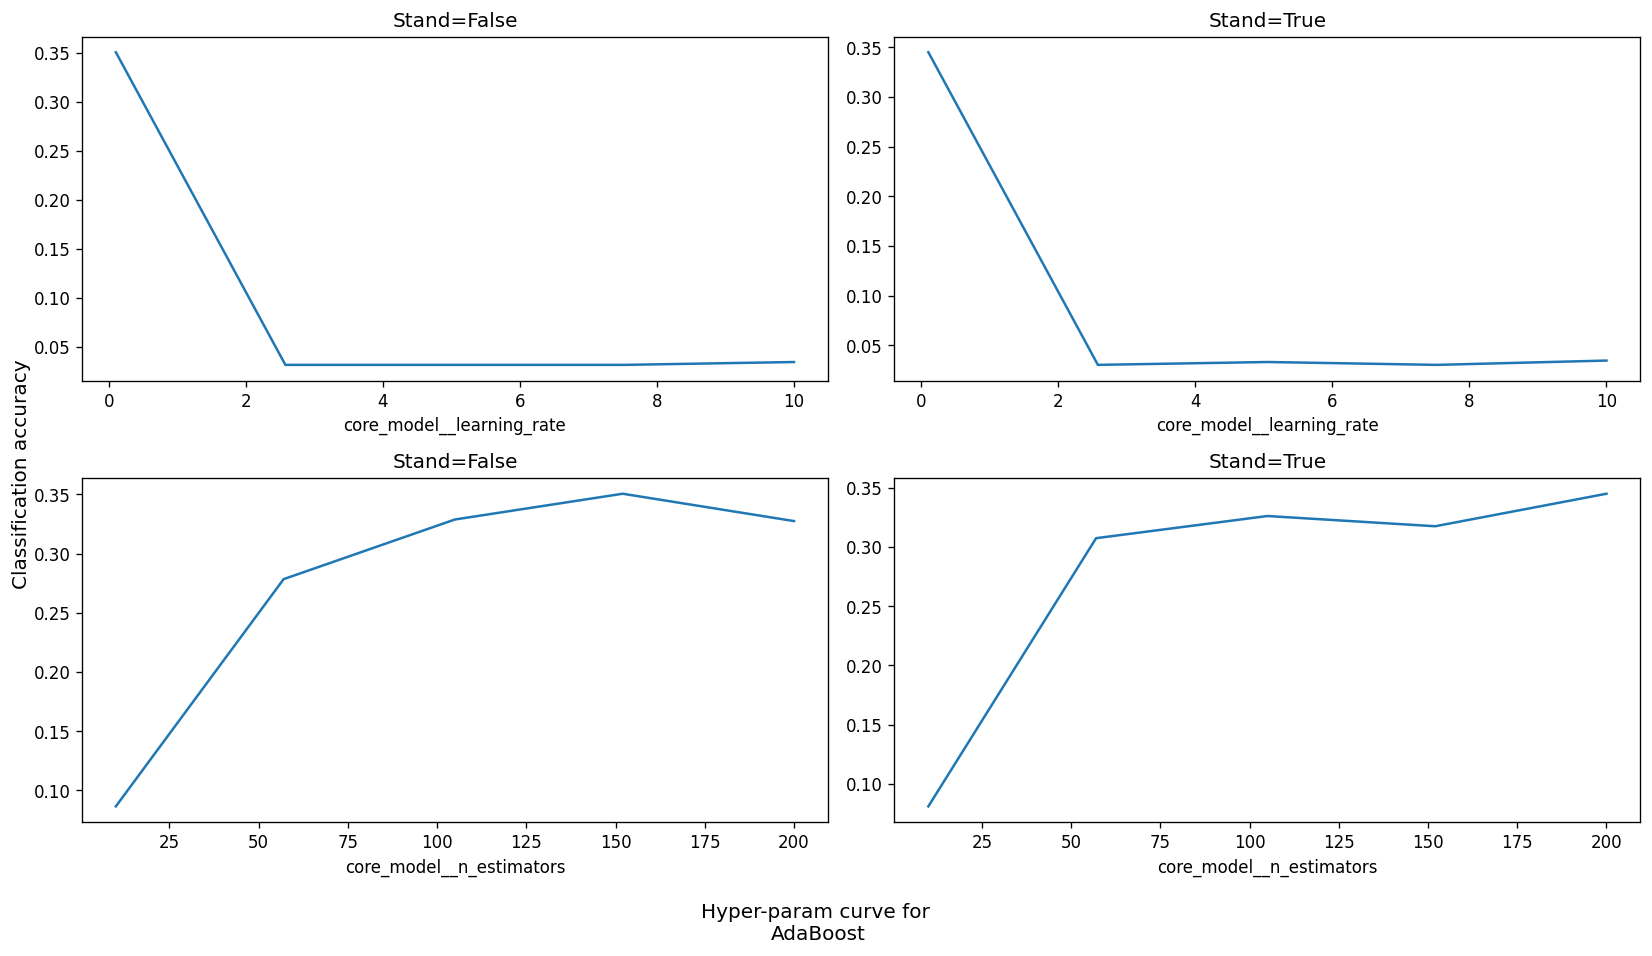

,AdaBoost (Stand=False),AdaBoost (Stand=True)
Accuracy,0.4444444444444444,0.44877344877344877
Precision,0.4444444444444444,0.44877344877344877
Recall,0.4444444444444444,0.44877344877344877
Specificity,0.9943310657596371,0.9943752392731985
Fallout,0.005668934240362812,0.005624760726801543
F1 Score,0.2745819105157167,0.2791086046672211
F Score,0.4444444444444444,0.44877344877344877
Support,Not Applicable,Not Applicable
ROC AUC,0.9847916903310491,0.984185882145066
Log loss,3.0533218697327444,3.118266910943676


~~~~~~~~~~~~~~~ TEST SET ~~~~~~~~~~~~~~~


,AdaBoost (Stand=False),AdaBoost (Stand=True)
Accuracy,0.26936026936026936,0.26936026936026936
Precision,0.26936026936026936,0.26936026936026936
Recall,0.26936026936026936,0.26936026936026936
Specificity,0.9925444925444925,0.9925444925444925
Fallout,0.007455507455507456,0.007455507455507456
F1 Score,0.11499275840804334,0.11499275840804334
F Score,0.26936026936026936,0.26936026936026936
Support,Not Applicable,Not Applicable
ROC AUC,0.962459057697153,0.9617261045832474
Log loss,3.282162592633903,3.330784405430138


In [5]:
# Random Forest
mt = ModelTester("RandomForest")
mt.test(dataset, train_set, test_set)

# Ada Boost
mt = ModelTester("AdaBoost")
mt.test(dataset, train_set, test_set)

# Gradient Boosted Trees
# mt = ModelTester("GradientBoostedTrees")
# mt.test(dataset, train_set, test_set)

~~~~~~~~~~~~~~~ LEARNING CURVE ~~~~~~~~~~~~~~~


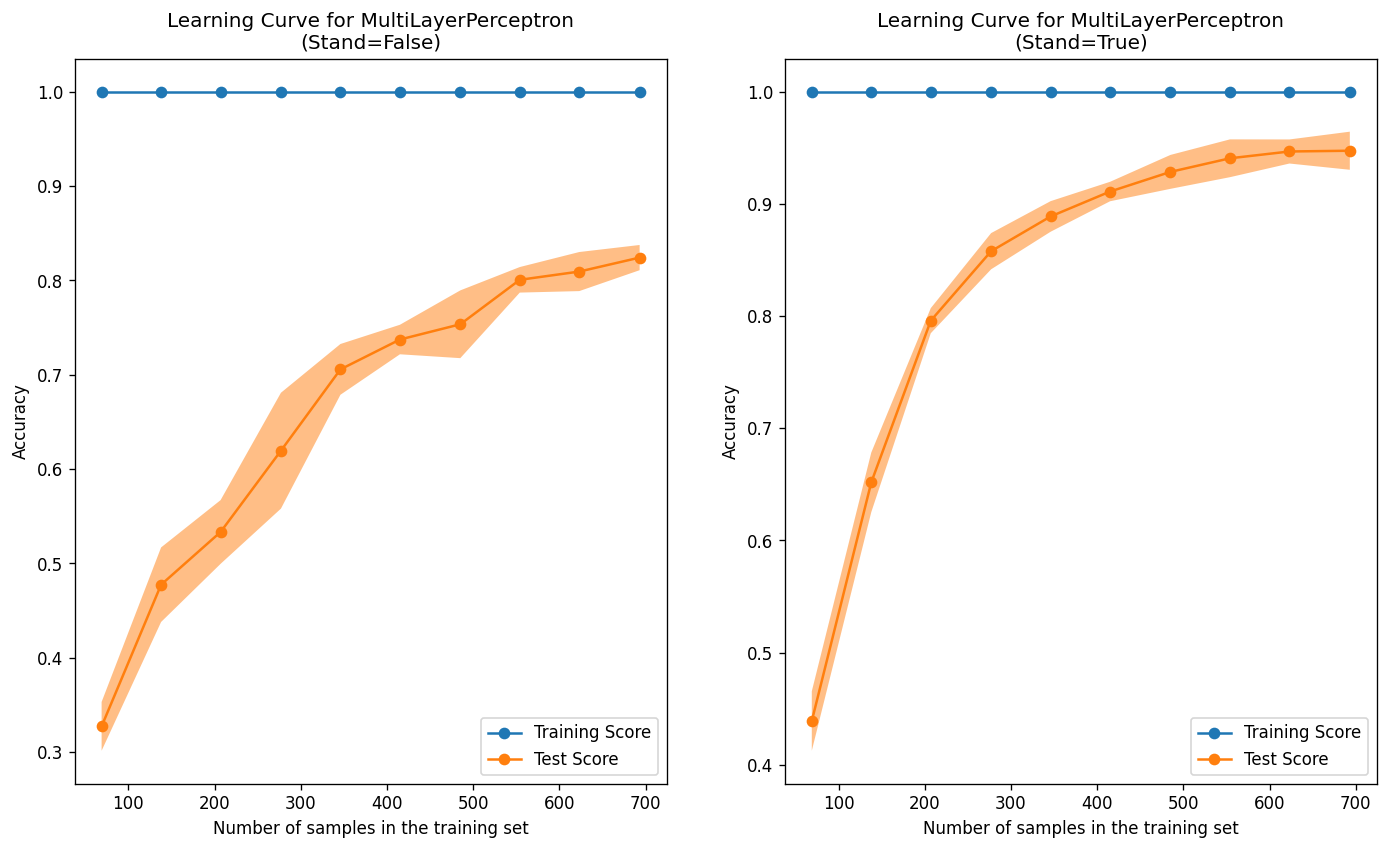

~~~~~~~~~~~~~~~ TRAIN SET ~~~~~~~~~~~~~~~


,MultiLayerPerceptron (Stand=False),MultiLayerPerceptron (Stand=True)
Accuracy,1.0,1.0
Precision,1.0,1.0
Recall,1.0,1.0
Specificity,1.0,1.0
Fallout,0.0,0.0
F1 Score,1.0,1.0
F Score,1.0,1.0
Support,Not Applicable,Not Applicable
ROC AUC,1.0,1.0
Log loss,0.0003902208450275664,5.4490760268243057e-05


~~~~~~~~~~~~~~~ TEST SET ~~~~~~~~~~~~~~~


,MultiLayerPerceptron (Stand=False),MultiLayerPerceptron (Stand=True)
Accuracy,0.8619528619528619,0.9326599326599326
Precision,0.8619528619528619,0.9326599326599326
Recall,0.8619528619528619,0.9326599326599326
Specificity,0.9985913557342129,0.9993128564557135
Fallout,0.001408644265787123,0.0006871435442864014
F1 Score,0.7986509851965136,0.900483231326879
F Score,0.8619528619528619,0.9326599326599326
Support,Not Applicable,Not Applicable
ROC AUC,0.9973544973544973,0.9996564282278568
Log loss,1.146471588306568,0.35003169040233756


In [6]:
mt = ModelTester("MultiLayerPerceptron")
mt.test(dataset, train_set, test_set)

In [7]:
from models.Models import *

# Load Test Data
test_dl = DataLoader("data/test.csv", class_col_name="id")
test_dl.load()
submission_set = test_dl.get_dataset()

In [8]:
lc = LogisticClassifier(stand_trans=True)
lc.train(dataset)
probs, classes = lc.predict_probs(submission_set.features)

df = pd.DataFrame(
    data=probs,
    columns=dl.classes,
    index=test_dl.classes
)
display(df)
df.to_csv("submissions/logi_submission.csv", index_label="id")

,Acer_Opalus,Pterocarya_Stenoptera,Quercus_Hartwissiana,Tilia_Tomentosa,Quercus_Variabilis,Magnolia_Salicifolia,Quercus_Canariensis,Quercus_Rubra,Quercus_Brantii,Salix_Fragilis,...,Quercus_Ellipsoidalis,Quercus_x_Hispanica,Quercus_Shumardii,Quercus_Rhysophylla,Castanea_Sativa,Ulmus_Bergmanniana,Quercus_Nigra,Salix_Intergra,Quercus_Infectoria_sub,Sorbus_Aria
4,9.626226e-05,2.243931e-05,2.068715e-05,2.482417e-07,0.001606,6.667009e-10,4.322698e-05,2.683414e-03,1.401837e-04,1.082161e-08,...,2.384849e-06,1.197965e-08,5.704861e-05,3.154588e-05,3.534207e-07,8.018971e-08,1.712362e-07,6.477185e-06,1.158789e-06,3.262536e-06
7,5.686351e-04,7.460531e-07,4.699613e-06,5.893859e-04,0.000178,9.574971e-05,3.516704e-05,1.114246e-05,3.395847e-05,2.942779e-05,...,1.245325e-04,1.090743e-04,6.063340e-06,1.086127e-05,3.548287e-04,2.200793e-05,1.053626e-07,6.123383e-05,6.310607e-05,9.029640e-07
9,9.668366e-05,1.711233e-04,4.188019e-05,4.138434e-05,0.000155,1.776953e-06,6.842878e-05,1.094842e-04,1.442983e-04,9.635952e-05,...,4.805036e-05,9.810524e-06,3.279602e-05,4.384738e-05,6.035268e-04,1.625807e-04,5.354598e-06,9.481647e-06,1.469514e-06,3.792099e-05
12,3.372663e-05,2.132774e-06,2.104541e-05,3.485680e-04,0.000026,3.654479e-06,2.012974e-05,2.528941e-05,1.320187e-05,1.306628e-04,...,2.385430e-04,4.369801e-05,1.031969e-04,8.189274e-05,9.433351e-01,1.288807e-02,4.018731e-07,8.318038e-06,4.674629e-06,3.390871e-05
13,9.574478e-07,4.158060e-04,5.788397e-07,1.773940e-04,0.000003,4.037278e-08,7.300640e-06,1.976372e-05,1.531872e-05,4.463957e-05,...,2.869076e-05,1.819990e-06,2.631866e-05,3.111598e-05,3.707379e-06,1.205058e-03,2.838292e-06,8.484434e-07,2.846332e-07,1.513288e-04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1576,3.226683e-05,9.835219e-05,1.722459e-05,2.936511e-05,0.000118,1.790781e-06,4.035574e-05,2.603835e-05,2.740012e-05,4.352104e-05,...,1.912978e-05,3.853184e-06,1.678266e-05,1.653226e-05,1.800484e-04,3.641105e-04,2.643068e-06,1.509372e-05,6.732901e-07,3.915624e-05
1577,6.455773e-04,1.333702e-04,6.368430e-04,3.601617e-03,0.000265,2.040304e-07,1.342214e-03,8.360440e-06,5.391104e-03,5.395842e-05,...,8.601933e-06,2.504439e-04,8.130602e-05,3.959021e-05,5.349416e-04,3.766394e-04,2.222314e-05,2.022917e-05,2.760077e-05,1.881606e-03
1579,1.191667e-06,4.762114e-05,6.224253e-03,2.803404e-08,0.000022,6.095898e-09,9.861874e-01,3.177361e-05,7.561716e-04,7.629562e-08,...,8.937607e-07,5.436832e-05,2.277703e-04,8.197596e-06,2.844738e-06,1.589845e-07,6.382229e-04,2.299294e-07,3.519012e-05,2.077050e-05
1580,3.249201e-05,1.154500e-05,8.589556e-07,2.281614e-05,0.000001,5.267076e-06,1.848097e-07,5.103309e-08,3.386710e-07,3.603656e-05,...,6.609074e-06,1.535299e-04,2.804256e-07,6.330674e-07,3.265141e-03,2.081710e-06,3.240827e-07,1.411299e-04,2.236342e-05,3.264728e-07


In [9]:
svm = SupportVectorMachine(stand_trans=True)
svm.train(dataset)
probs, classes = svm.predict_probs(submission_set.features)

df = pd.DataFrame(
    data=probs,
    columns=dl.classes,
    index=test_dl.classes
)
display(df)
df.to_csv("submissions/svm_submission.csv", index_label="id")

,Acer_Opalus,Pterocarya_Stenoptera,Quercus_Hartwissiana,Tilia_Tomentosa,Quercus_Variabilis,Magnolia_Salicifolia,Quercus_Canariensis,Quercus_Rubra,Quercus_Brantii,Salix_Fragilis,...,Quercus_Ellipsoidalis,Quercus_x_Hispanica,Quercus_Shumardii,Quercus_Rhysophylla,Castanea_Sativa,Ulmus_Bergmanniana,Quercus_Nigra,Salix_Intergra,Quercus_Infectoria_sub,Sorbus_Aria
4,0.007348,0.009129,0.009825,0.005664,0.022076,0.003360,0.012107,0.024551,0.010423,0.004164,...,0.004949,0.004672,0.009005,0.009666,0.004531,0.004836,0.005972,0.005673,0.009820,0.005896
7,0.029203,0.004571,0.006261,0.016574,0.010962,0.011100,0.008221,0.003713,0.007232,0.005895,...,0.007624,0.014002,0.005841,0.004709,0.015793,0.006818,0.003611,0.010059,0.016079,0.003979
9,0.011668,0.013514,0.010791,0.012701,0.010859,0.004554,0.012252,0.005751,0.011663,0.007168,...,0.004945,0.008457,0.008176,0.006162,0.011260,0.012958,0.005440,0.004645,0.008460,0.006701
12,0.012609,0.007757,0.007793,0.021112,0.007610,0.005153,0.008141,0.004568,0.008125,0.010063,...,0.008151,0.009925,0.009169,0.006700,0.090790,0.027539,0.004450,0.005117,0.008465,0.008146
13,0.008024,0.023063,0.006889,0.016371,0.006754,0.003505,0.008339,0.005438,0.008665,0.010439,...,0.006635,0.007383,0.011469,0.007340,0.007880,0.028187,0.006118,0.004272,0.006735,0.012185
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1576,0.011861,0.013468,0.010682,0.013796,0.011301,0.004867,0.011935,0.005032,0.009739,0.007426,...,0.004748,0.008149,0.007501,0.006088,0.010614,0.016612,0.005256,0.005291,0.008381,0.007388
1577,0.016181,0.012529,0.015479,0.024670,0.009232,0.003205,0.016247,0.003434,0.021934,0.006566,...,0.003723,0.013139,0.007409,0.005229,0.010458,0.013536,0.005380,0.004737,0.009792,0.013766
1579,0.007035,0.009769,0.038992,0.004480,0.009693,0.003457,0.126317,0.006982,0.020685,0.003299,...,0.004138,0.011922,0.012756,0.005926,0.004675,0.004018,0.018860,0.004154,0.016334,0.006579
1580,0.014462,0.011362,0.006933,0.010728,0.007753,0.007497,0.006775,0.004715,0.006291,0.010380,...,0.007187,0.016663,0.006594,0.005547,0.021177,0.007437,0.005901,0.011715,0.015818,0.006272


In [10]:
mlp = MultiLayerPerceptron(stand_trans=True)
mlp.train(dataset)
probs, classes = mlp.predict_probs(submission_set.features)

df = pd.DataFrame(
    data=probs,
    columns=dl.classes,
    index=test_dl.classes
)
display(df)
df.to_csv("submissions/mlp_submission.csv", index_label="id")

,Acer_Opalus,Pterocarya_Stenoptera,Quercus_Hartwissiana,Tilia_Tomentosa,Quercus_Variabilis,Magnolia_Salicifolia,Quercus_Canariensis,Quercus_Rubra,Quercus_Brantii,Salix_Fragilis,...,Quercus_Ellipsoidalis,Quercus_x_Hispanica,Quercus_Shumardii,Quercus_Rhysophylla,Castanea_Sativa,Ulmus_Bergmanniana,Quercus_Nigra,Salix_Intergra,Quercus_Infectoria_sub,Sorbus_Aria
4,2.435869e-53,1.069519e-31,9.471230e-29,2.195521e-78,1.961245e-26,1.613791e-94,3.256532e-37,4.625039e-11,2.603111e-23,1.917948e-72,...,2.149201e-64,1.277614e-71,1.917309e-47,1.146026e-32,2.977016e-55,4.040850e-77,7.687360e-53,1.327430e-80,2.027277e-40,1.184818e-37
7,4.347886e-07,7.676652e-38,2.112563e-48,8.185241e-28,7.602065e-18,1.591830e-07,4.226821e-42,5.079726e-41,2.005066e-42,2.882742e-20,...,1.130240e-35,5.664068e-20,5.075007e-56,1.260818e-41,4.734525e-08,5.081506e-34,8.196796e-56,1.198145e-14,5.025972e-14,8.072905e-42
9,2.353716e-39,3.229554e-35,1.191335e-32,1.910032e-43,1.424489e-20,3.693368e-47,4.473689e-29,7.411206e-37,4.793869e-27,1.945875e-43,...,6.345702e-45,4.920936e-40,1.087681e-38,3.158725e-47,6.431884e-29,4.354169e-38,4.260649e-38,1.257862e-53,2.041752e-39,1.010564e-45
12,7.832812e-28,5.495702e-28,2.632179e-55,1.736261e-07,3.602185e-10,5.216110e-37,4.519270e-63,3.797853e-40,8.585863e-46,1.002722e-16,...,1.193634e-31,3.413461e-28,9.467420e-45,3.115156e-47,3.436025e-02,5.739593e-01,3.425747e-69,1.370342e-43,4.247509e-37,7.399390e-34
13,5.050303e-33,4.145194e-22,7.156745e-45,4.140153e-16,2.685589e-13,5.637618e-44,1.672244e-50,1.958244e-28,6.265351e-36,1.624695e-27,...,4.121876e-27,2.718802e-34,3.383300e-31,2.848752e-41,5.593432e-30,2.521549e-12,1.308615e-49,3.712018e-43,4.990501e-34,4.440755e-20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1576,2.716373e-38,4.547069e-35,5.060454e-33,8.939394e-43,2.056628e-20,7.376287e-46,1.046520e-29,8.412990e-40,4.548077e-28,2.388412e-42,...,1.727069e-44,3.701451e-40,3.818326e-41,1.386469e-49,1.738382e-27,2.039501e-36,3.556619e-38,1.901239e-53,1.944551e-40,1.291024e-45
1577,7.598639e-11,4.555390e-17,8.314432e-23,3.950315e-09,1.276900e-10,2.407318e-32,5.008706e-28,7.301763e-26,5.592134e-21,3.026023e-17,...,8.595698e-28,3.038215e-13,4.651627e-31,3.540992e-31,1.000845e-13,3.148802e-15,1.236088e-38,1.425644e-31,2.734601e-20,6.738301e-17
1579,1.330200e-43,6.297947e-32,3.782618e-04,2.752588e-68,1.705149e-27,3.719997e-62,9.996217e-01,6.164418e-20,3.723435e-17,4.575315e-54,...,8.301047e-53,1.952421e-52,2.416979e-34,3.300347e-43,3.961316e-47,1.564018e-66,8.184959e-18,1.240854e-62,5.431963e-29,3.577258e-44
1580,2.481533e-27,3.762423e-43,9.802217e-84,5.835157e-57,3.172761e-39,2.644035e-43,8.609562e-80,3.808776e-72,1.552771e-47,9.412680e-53,...,4.604506e-41,5.018407e-24,2.334792e-72,3.753939e-56,3.090427e-29,2.470417e-52,9.998987e-84,9.388138e-16,5.880566e-26,3.563106e-49


In [11]:
rf = RandomForest(stand_trans=True)
rf.train(dataset)
probs, classes = rf.predict_probs(submission_set.features)

df = pd.DataFrame(
    data=probs,
    columns=dl.classes,
    index=test_dl.classes
)
display(df)
df.to_csv("submissions/rf_submission.csv", index_label="id")

,Acer_Opalus,Pterocarya_Stenoptera,Quercus_Hartwissiana,Tilia_Tomentosa,Quercus_Variabilis,Magnolia_Salicifolia,Quercus_Canariensis,Quercus_Rubra,Quercus_Brantii,Salix_Fragilis,...,Quercus_Ellipsoidalis,Quercus_x_Hispanica,Quercus_Shumardii,Quercus_Rhysophylla,Castanea_Sativa,Ulmus_Bergmanniana,Quercus_Nigra,Salix_Intergra,Quercus_Infectoria_sub,Sorbus_Aria
4,0.00,0.00,0.00,0.00,0.02,0.00,0.00,0.05,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
7,0.02,0.00,0.00,0.02,0.00,0.02,0.00,0.00,0.00,0.01,...,0.01,0.02,0.00,0.00,0.08,0.00,0.00,0.00,0.00,0.00
9,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.01,0.01,0.00,0.00,0.00,0.01
12,0.02,0.00,0.00,0.05,0.00,0.00,0.01,0.01,0.00,0.00,...,0.05,0.00,0.00,0.00,0.18,0.04,0.00,0.00,0.01,0.01
13,0.00,0.02,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.00,...,0.00,0.00,0.00,0.00,0.01,0.01,0.00,0.00,0.00,0.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1576,0.00,0.00,0.00,0.00,0.02,0.00,0.01,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.00
1577,0.00,0.02,0.03,0.00,0.01,0.00,0.01,0.00,0.01,0.00,...,0.00,0.01,0.01,0.00,0.00,0.00,0.01,0.00,0.00,0.01
1579,0.00,0.01,0.02,0.00,0.00,0.00,0.40,0.00,0.01,0.00,...,0.00,0.00,0.01,0.01,0.00,0.00,0.01,0.00,0.00,0.00
1580,0.03,0.00,0.00,0.01,0.00,0.01,0.00,0.00,0.00,0.01,...,0.00,0.07,0.00,0.00,0.03,0.00,0.00,0.06,0.02,0.00
